# Twitter Sentiment Analysis

- Twitter Sentiment Analysis It is a Natural Language Processing Problem where Sentiment Analysis is done by Classifying the Positive tweets from negative tweets by machine learning models for classification, text mining, text analysis, data analysis and data visualization. 
*In this project we have built a model which takes a dataset as an input and as an output gives the percentage of Positive,Negative,Neutral and Irrelevant tweets in the given dataset. It is done using natural language processing library using scikit learn machine learning libraries.

## Sentiment Analysis
- Sentiment analysis refers to a process which is used for determining if the given information is positive , negative , neutral or irrelevant using computational methods .

## Problem Statement
- Let’s go through the problem statement once as it is very crucial to understand the objective before working on the dataset. The problem statement is as follows:

- The objective of this task is to detect different types of sentiment in tweets. For the sake of simplicity, we say a tweet contains Positive,Negative,Neutral,Itterative sentiment if it has tweet associated with it. So, the task is to classify Positive,Negative,Neutral,Itterative sentiment tweets from other tweets so our objective is to predict the labels on the given test dataset.

In [1]:
# Import all Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import All Dataset

In [2]:
# Import Dataset
train=pd.read_csv('twitter_training.csv',header=None)
train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
# Import Test Dataset

test=pd.read_csv('twitter_validation.csv',header=None)
test.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
train=train.drop([0,1],1)
test=test.drop([0,1],1)

In [5]:
train.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
test.head()

,2,3
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...


### Create Main Dataframe

In [7]:
df=pd.concat([train,test]).reset_index(drop=True)
df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df.columns=['Sentiment','Tweet']
df.head()

,Sentiment,Tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
# Shape

df.shape

(75682, 2)

In [10]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  75682 non-null  object
 1   Tweet      74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [11]:
# Describe

df.describe().T

,count,unique,top,freq
Sentiment,75682,4,Negative,22808
Tweet,74996,69974,,172


### Exploratory Data Analysis

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

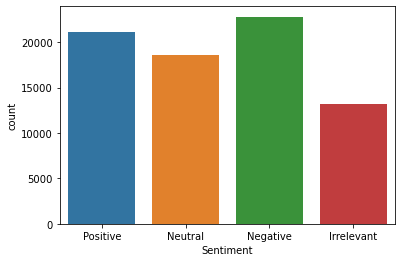

In [12]:
# countplot

sns.countplot(df['Sentiment'])

In [13]:
# Check Missing values

df.isnull().sum()

Sentiment      0
Tweet        686
dtype: int64

In [14]:
df=df.dropna()
df.head()

,Sentiment,Tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
# Check Missing values

df.isnull().sum()

Sentiment    0
Tweet        0
dtype: int64

In [16]:
df.shape

(74996, 2)

In [17]:
# Adding a column to represent the length of the tweet

df['Len'] = df['Tweet'].str.len()

df.head()

,Sentiment,Tweet,Len
0,Positive,im getting on borderlands and i will murder yo...,53
1,Positive,I am coming to the borders and I will kill you...,51
2,Positive,im getting on borderlands and i will kill you ...,50
3,Positive,im coming on borderlands and i will murder you...,51
4,Positive,im getting on borderlands 2 and i will murder ...,57


<AxesSubplot:xlabel='Len'>

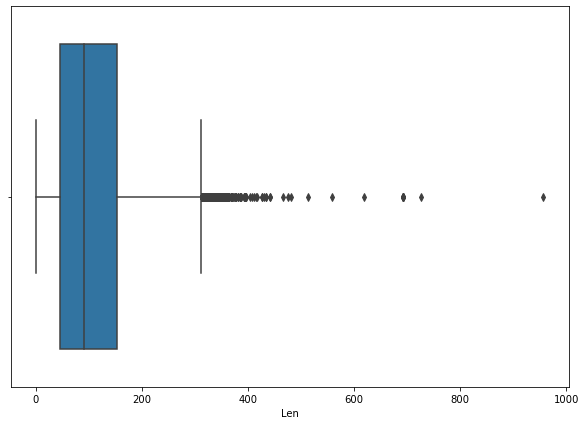

In [18]:
# Box Plot

plt.figure(figsize=(10,7))
sns.boxplot(df['Len'])

<AxesSubplot:>

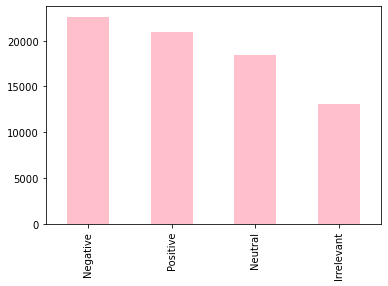

In [19]:
df['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

### Text Cleaning

### 1. Hashtag Removing

- Every Twitter user has a unique username. Any thing directed towards that user can be indicated be writing their username preceded by ‘@’. Thus, these are like proper nouns. For example, @Apple
Regular Expression: @(\w+)

Replace Expression: HNDL_\1

In [20]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [21]:
import re

# extracting hashtags from non racist/sexist tweets
HT_positive = hashtag_extract(df['Tweet'][df['Sentiment'] == 'Positive'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['Tweet'][df['Sentiment'] == 'Negative'])

# extracting hashtags from racist/sexist tweets
HT_neutral = hashtag_extract(df['Tweet'][df['Sentiment'] == 'Neutral'])

# extracting hashtags from racist/sexist tweets
HT_irrelevant = hashtag_extract(df['Tweet'][df['Sentiment'] == 'Irrelevant'])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

HT_neutral = sum(HT_neutral,[])
HT_irrelevant = sum(HT_irrelevant,[])

### Top 10 Frequent Hashtag for Positive Sentiment

<Figure size 2160x2160 with 0 Axes>

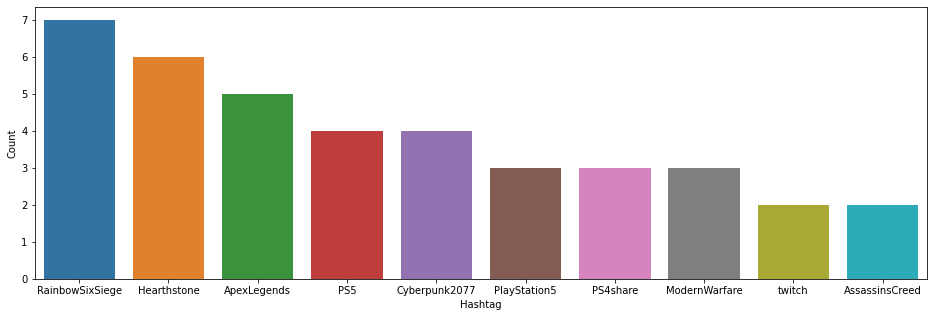

In [22]:
import nltk
plt.figure(figsize=(30,30))
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### Top 10 Frequent Hashtag for Negative Sentiment

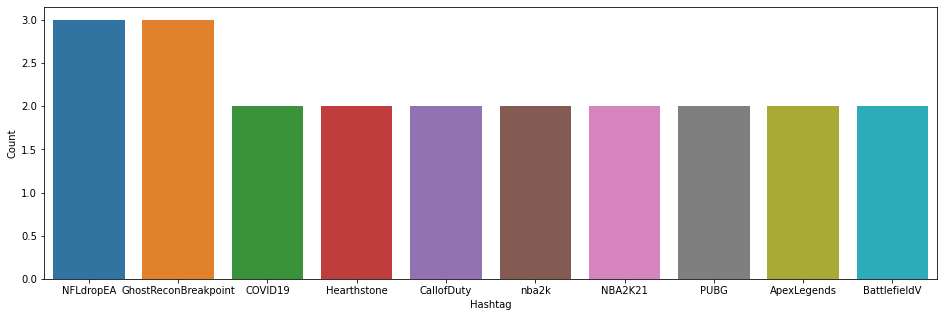

In [23]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### Top 10 Frequent Hashtag for Neutral Sentiment

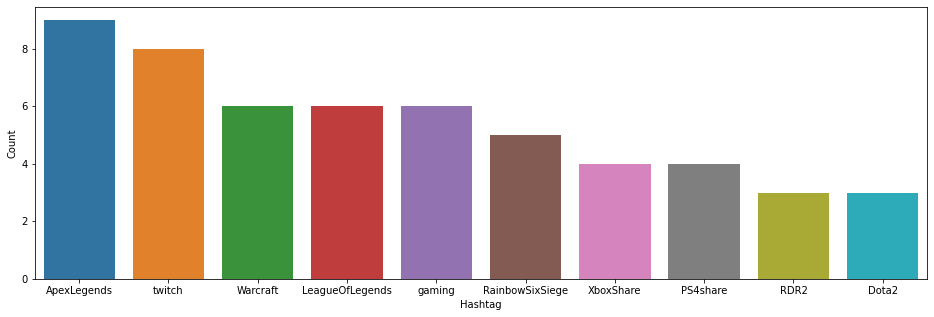

In [24]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

### Top 10 Frequent Hashtag for Irrelevant Sentiment

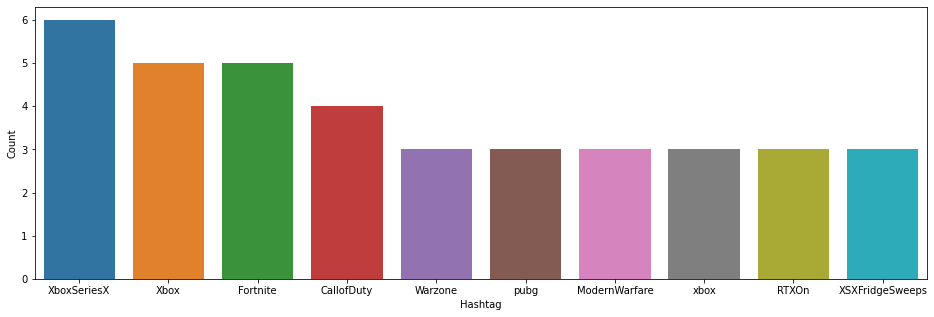

In [25]:
a = nltk.FreqDist(HT_irrelevant)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Text Cleaning


### 1.URLs
Users often share hyperlinks in their tweets. Twitter shortens them using its in-house URL shortening service, like http://t.co/FCWXoUd8 - such links also enables Twitter to alert users if the link leads out of its domain. From the point of view of text classification, a particular URL is not important. However, presence of a URL can be an important feature. Regular expression for detecting a URL is fairly complex because of different types of URLs that can be there, but because of Twitter’s shortening service, we can use a relatively simple regular expression.
Regular Expression: (http|https|ftp)://[a-zA-Z0-9\./]+

Replace Expression: URL

### 2.Emoticons
Use of emoticons is very prevalent throughout the web, more so on micro- blogging sites. We identify the following emoticons and replace them with a single word lists the emoticons we are currently detecting. All other emoticons would be ignored.

### 3.Punctuations
Although not all Punctuations are important from the point of view of classification but some of these, like question mark, exclamation mark can also provide information about the sentiments of the text. We replace every word boundary by a list of relevant punctuations present at that point.  lists the punctuations currently identified. We also remove any single quotes that might exist in the text.

### 4.Repeating Characters
People often use repeating characters while using colloquial language, like "I’m in a hurrryyyyy", "We won, yaaayyyyy!" As our final pre-processing step, we replace characters repeating more than twice as two characters.
Regular Expression: (.)\1{1,}

Replace Expression: \1\1

In [26]:
# removing unwanted patterns from the data

import re
import nltk
import emoji

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujit1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.Custom Cleaning

In [27]:
def cleaner(tweet):
    tweet = tweet.lower()
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = tweet.replace('!',"").replace("_"," ")
    tweet = tweet.replace('?',"").replace("_"," ")
    tweet = tweet.replace('&',"").replace("_"," ")
    tweet = tweet.replace('/',"").replace("_"," ")
    tweet = tweet.replace('$',"").replace("_"," ")
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet

In [28]:
df['Tweet'] = df['Tweet'].astype(str).map(lambda x: cleaner(x))

In [29]:
df['Tweet']

0        im getting on borderlands and i will murder yo...
1        i am coming to the borders and i will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
75677    ⭐️ toronto is the arts and culture capital of ...
75678    this is actually a good move tot bring more vi...
75679    today sucked so it’s time to drink wine n play...
75680    bought a fraction of microsoft today. small wins.
75681    johnson johnson to stop selling talc baby powd...
Name: Tweet, Length: 74996, dtype: object

In [30]:
df['new_tweet'] = df['Tweet'].apply(lambda x: x.split())
df.head()

,Sentiment,Tweet,Len,new_tweet
0,Positive,im getting on borderlands and i will murder yo...,53,"[im, getting, on, borderlands, and, i, will, m..."
1,Positive,i am coming to the borders and i will kill you...,51,"[i, am, coming, to, the, borders, and, i, will..."
2,Positive,im getting on borderlands and i will kill you ...,50,"[im, getting, on, borderlands, and, i, will, k..."
3,Positive,im coming on borderlands and i will murder you...,51,"[im, coming, on, borderlands, and, i, will, mu..."
4,Positive,im getting on borderlands 2 and i will murder ...,57,"[im, getting, on, borderlands, 2, and, i, will..."


## Stemming

- All stemming algorithms are of the following major types – affix removing, statistical and mixed. The first kind, Affix removal stemmer, is the most basic one. These apply a set of transformation rules to each word in an attempt to cut off commonly known prefixes and / or suffixes. A trivial stemming algorithm would be to truncate words at N-th symbol. But this obviously is not well suited for practical purposes.

### Porter Stemmer
- Martin Porter wrote a stemmer that was published in July 1980. This stemmer was very widely used and became and remains the de facto standard algorithm used for English stemming. It offers excellent trade-off between speed, readability, and accuracy. It uses a set of around 60 rules applied in 6 successive steps. An important feature to note is that it doesn’t involve recursion.

In [31]:
#stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['new_tweet']= df['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,Sentiment,Tweet,Len,new_tweet
0,Positive,im getting on borderlands and i will murder yo...,53,"[im, get, on, borderland, and, i, will, murder..."
1,Positive,i am coming to the borders and i will kill you...,51,"[i, am, come, to, the, border, and, i, will, k..."
2,Positive,im getting on borderlands and i will kill you ...,50,"[im, get, on, borderland, and, i, will, kill, ..."
3,Positive,im coming on borderlands and i will murder you...,51,"[im, come, on, borderland, and, i, will, murde..."
4,Positive,im getting on borderlands 2 and i will murder ...,57,"[im, get, on, borderland, 2, and, i, will, mur..."


## Lemmatization

- Lemmatization is the process of normalizing a word rather than just finding its stem. In the process, a suffix may not only be removed, but may also be substituted with a different one. It may also involve first determining the part-of-speech for a word and then applying normalization rules. It might also involve dictionary look-up. For example, verb ‘saw’ would be lemmatized to ‘see’ and the noun ‘saw’ will remain ‘saw’. For our purpose of classifying text, stemming should suffice.

In [32]:
# Lemmitization
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

df['new_tweet']= df['new_tweet'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
df.head()

,Sentiment,Tweet,Len,new_tweet
0,Positive,im getting on borderlands and i will murder yo...,53,"[im, get, on, borderland, and, i, will, murder..."
1,Positive,i am coming to the borders and i will kill you...,51,"[i, am, come, to, the, border, and, i, will, k..."
2,Positive,im getting on borderlands and i will kill you ...,50,"[im, get, on, borderland, and, i, will, kill, ..."
3,Positive,im coming on borderlands and i will murder you...,51,"[im, come, on, borderland, and, i, will, murde..."
4,Positive,im getting on borderlands 2 and i will murder ...,57,"[im, get, on, borderland, 2, and, i, will, mur..."


In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujit1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Stopwords

- Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

In [34]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')


In [35]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get','im']
stopwords.extend(newStopWords)

In [36]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [37]:
df['new_tweet'] = df['new_tweet'].apply(process) 
df.head()

,Sentiment,Tweet,Len,new_tweet
0,Positive,im getting on borderlands and i will murder yo...,53,"[borderland, murder]"
1,Positive,i am coming to the borders and i will kill you...,51,"[kill, border, all,, come]"
2,Positive,im getting on borderlands and i will kill you ...,50,"[borderland, kill, all,]"
3,Positive,im coming on borderlands and i will murder you...,51,"[all,, borderland, murder, come]"
4,Positive,im getting on borderlands 2 and i will murder ...,57,"[2, borderland, murder, all,]"


In [38]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
df['new_tweet'] = df['new_tweet'].apply(string)
df.head()  

,Sentiment,Tweet,Len,new_tweet
0,Positive,im getting on borderlands and i will murder yo...,53,borderland murder
1,Positive,i am coming to the borders and i will kill you...,51,"kill border all, come"
2,Positive,im getting on borderlands and i will kill you ...,50,"borderland kill all,"
3,Positive,im coming on borderlands and i will murder you...,51,"all, borderland murder come"
4,Positive,im getting on borderlands 2 and i will murder ...,57,"2 borderland murder all,"


## WordCloud

- To get the most common words used to describe 2020, I made use of the POS-tag (Parts of Speech tagging) module in the NLTK library. Using the WordCloud library, one can generate a Word Cloud based on word frequency and superimpose these words on any image. In this case, I used the Twitter logo and Matplotlib to display the image. The Word Cloud shows the words with higher frequency in bigger text size while the "not-so" common words are in smaller text sizes.

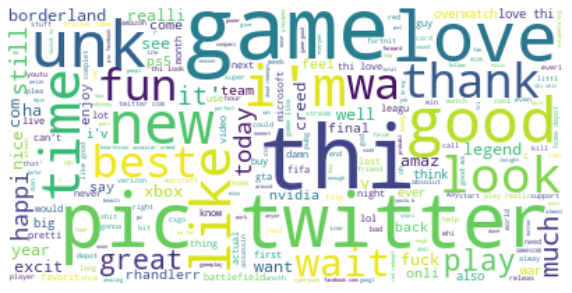

In [39]:
from wordcloud import WordCloud
positive = [r for r in df['new_tweet'][df['Sentiment']=='Positive']]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

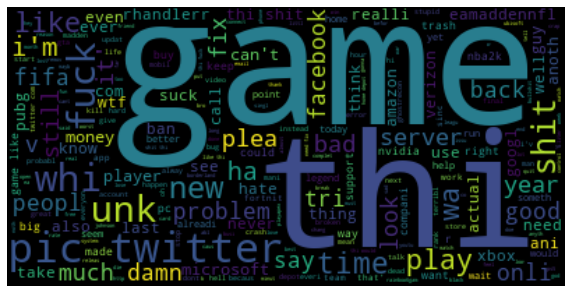

In [40]:
negative = [r for r in df['new_tweet'][df['Sentiment']=='Negative']]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

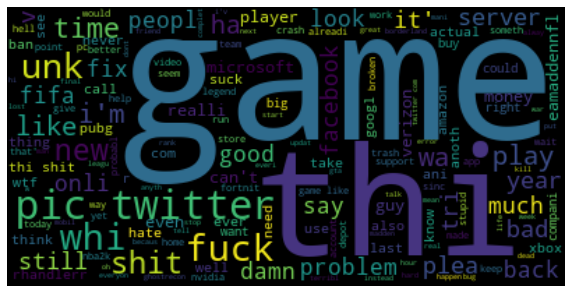

In [41]:
neutral = [r for r in df['new_tweet'][df['Sentiment']=='Neutral']]
neu = ''.join(neutral)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

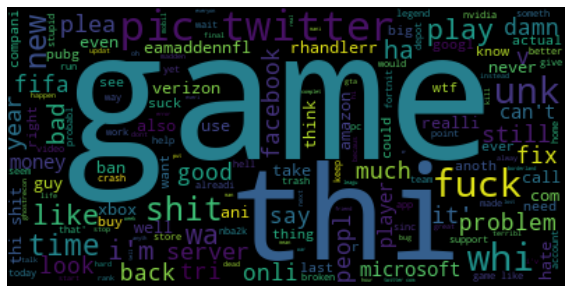

In [42]:
irrelevant = [r for r in df['new_tweet'][df['Sentiment']=='Irrelevant']]
irr = ''.join(neutral)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most Frequently Occuring Words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

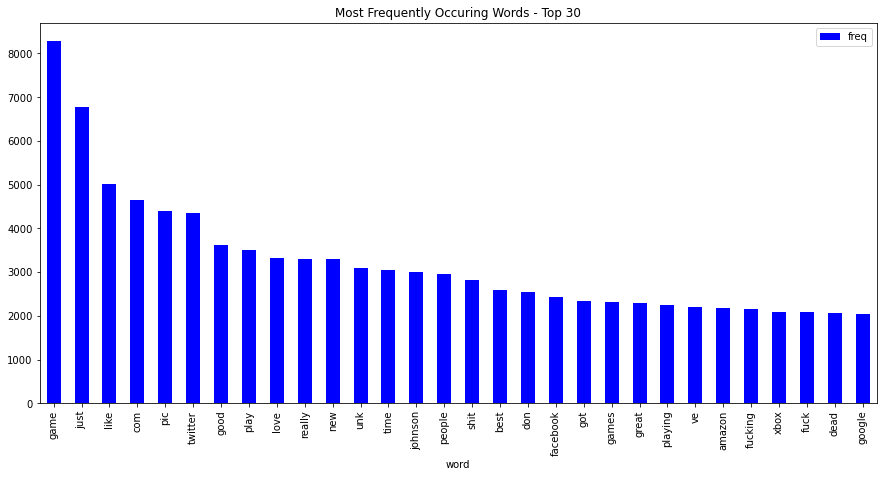

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Tweet'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


In [44]:
df.drop(["Tweet" ],axis=1,inplace=True)

df.head()

,Sentiment,Len,new_tweet
0,Positive,53,borderland murder
1,Positive,51,"kill border all, come"
2,Positive,50,"borderland kill all,"
3,Positive,51,"all, borderland murder come"
4,Positive,57,"2 borderland murder all,"


In [45]:
backup_df = df.copy()
backup_df.head()

,Sentiment,Len,new_tweet
0,Positive,53,borderland murder
1,Positive,51,"kill border all, come"
2,Positive,50,"borderland kill all,"
3,Positive,51,"all, borderland murder come"
4,Positive,57,"2 borderland murder all,"


## Splitting The Dataset

In [46]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["new_tweet"], 
                                                    df["Sentiment"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (59996,) (59996,)
testing set : (15000,) (15000,)


## Vectorization

- Vectorization is the process of converting an algorithm from operating on individual matrix elements one at a time, to operating on a batch of values in a single operation.Text Vectorization is the process of converting text into numerical representation.

#### 1. TF-IDF or ( Term Frequency(TF) Inverse Dense Frequency(IDF) )
— It is a technique which is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

#### 2. Bag of words
A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms. The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [48]:
x_test

26941                    cap, excit super look fascin veri
65854    johnson mysteri covid vaccin littl trial halt ...
7350     game good games, wa fun lot two pharah last as...
27858    reinstal excit creed gonna doom know beat pas ...
42428                                        pubg.... miss
                               ...                        
58914                   panti somebodi facebook smh again.
16802        continu ps5 wait thi can't unbelievable. play
27912                              know great pc aim peopl
3524                                   xbox bro fuck along
24548    restaur racist, eat there. say googl onli rest...
Name: new_tweet, Length: 15000, dtype: object

In [49]:
x_train

29146    apex [unk] disappoint legend pronoun polic des...
13148                        n2k still nba store close whi
64666    give hope either would choic challeng i'm good...
52229    huge even way red it' dead see updat el thi 2 ...
29119                                 re45 love forever...
                               ...                        
37541                                                     
6332                               loss. even i'm show 7-2
55392                          update.. call thi duti fuck
864      way mac together... feed outta dnd borderland ...
15956                                        intern welcom
Name: new_tweet, Length: 59996, dtype: object

In [50]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(59996, 29761)
(59996, 29761)


In [51]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(15000, 29761)
(15000, 29761)


# A] By Using TFIDF Vectorizer

## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [53]:
predictions = model.predict(x_test_tfidf)
predictions

array(['Positive', 'Neutral', 'Positive', ..., 'Negative', 'Irrelevant',
       'Neutral'], dtype=object)

In [54]:
submission  = model.predict(x_test_tfidf)
submission

array(['Positive', 'Neutral', 'Positive', ..., 'Negative', 'Irrelevant',
       'Neutral'], dtype=object)

In [55]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

90.06666666666666

In [56]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[2197,  130,   88,  251],
       [  33, 4110,   76,  245],
       [  23,  126, 3294,  263],
       [  24,  124,  107, 3909]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T
df

,precision,recall,f1-score,support
Irrelevant,0.824081,0.964866,0.888934,2277.000000
Negative,0.920699,0.915367,0.918025,4490.000000
Neutral,0.888829,0.923983,0.906065,3565.000000
Positive,0.938761,0.837404,0.885190,4668.000000
accuracy,0.900667,0.900667,0.900667,0.900667
macro avg,0.893092,0.910405,0.899554,15000.000000
weighted avg,0.904079,0.900667,0.900548,15000.000000


In [58]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 'NEG' else 'green'
    return 'color: %s' % color

In [59]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Sentiment'])
tweets['Tweets'] = x_test
tweets['Prediction'] = predictions
tweets['Sentiment'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
tweets

,Tweets,Prediction,Sentiment
26941,"cap, excit super look fascin veri",Positive,Positive
65854,johnson mysteri covid vaccin littl trial halt ...,Neutral,Neutral
7350,"game good games, wa fun lot two pharah last as...",Positive,Positive
27858,reinstal excit creed gonna doom know beat pas ...,Positive,Positive
42428,pubg.... miss,Negative,Negative
...,...,...,...
58914,panti somebodi facebook smh again.,Irrelevant,Irrelevant
16802,continu ps5 wait thi can't unbelievable. play,Positive,Positive
27912,know great pc aim peopl,Negative,Negative
3524,xbox bro fuck along,Irrelevant,Irrelevant


## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=400)

In [61]:
log_predictions = logmodel.predict(x_test_tfidf)
log_predictions

array(['Positive', 'Neutral', 'Positive', ..., 'Positive', 'Negative',
       'Neutral'], dtype=object)

In [62]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[1693,  330,  288,  355],
       [ 126, 3641,  362,  335],
       [ 130,  392, 2808,  376],
       [ 133,  356,  413, 3262]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

76.02666666666667

In [64]:
submission  = model.predict(x_test_tfidf)
submission_df = pd.DataFrame(columns=['Sentiment'])
submission_df['Sentiment'] = submission

submission_df.head(5)

,Sentiment
0,Positive
1,Neutral
2,Positive
3,Positive
4,Negative


In [65]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(log_predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T
df

,precision,recall,f1-score,support
Irrelevant,0.635034,0.813160,0.713142,2082.000000
Negative,0.815636,0.771562,0.792987,4719.000000
Neutral,0.757690,0.725394,0.741190,3871.000000
Positive,0.783381,0.753697,0.768252,4328.000000
accuracy,0.760267,0.760267,0.760267,0.760267
macro avg,0.747935,0.765953,0.753893,15000.000000
weighted avg,0.766308,0.760267,0.761401,15000.000000


In [66]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Sentiment'])
tweets['Tweets'] = x_test
tweets['Prediction'] = log_predictions
tweets['Sentiment'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
tweets

,Tweets,Prediction,Sentiment
26941,"cap, excit super look fascin veri",Positive,Positive
65854,johnson mysteri covid vaccin littl trial halt ...,Neutral,Neutral
7350,"game good games, wa fun lot two pharah last as...",Positive,Positive
27858,reinstal excit creed gonna doom know beat pas ...,Positive,Positive
42428,pubg.... miss,Positive,Negative
...,...,...,...
58914,panti somebodi facebook smh again.,Negative,Irrelevant
16802,continu ps5 wait thi can't unbelievable. play,Positive,Positive
27912,know great pc aim peopl,Positive,Negative
3524,xbox bro fuck along,Negative,Irrelevant


## DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train_tfidf,y_train)


DecisionTreeClassifier()

In [68]:
dt_predictions = model.predict(x_test_tfidf)
dt_predictions

array(['Positive', 'Neutral', 'Positive', ..., 'Negative', 'Irrelevant',
       'Negative'], dtype=object)

In [69]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,dt_predictions)

array([[1873,  241,  187,  365],
       [ 176, 3585,  274,  429],
       [ 162,  291, 2833,  420],
       [ 185,  307,  269, 3403]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dt_predictions)*100

77.96

In [71]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(dt_predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T
df

,precision,recall,f1-score,support
Irrelevant,0.702551,0.781720,0.740024,2396.0000
Negative,0.803091,0.810353,0.806706,4424.0000
Neutral,0.764436,0.795116,0.779474,3563.0000
Positive,0.817243,0.737059,0.775083,4617.0000
accuracy,0.779600,0.779600,0.779600,0.7796
macro avg,0.771830,0.781062,0.775322,15000.0000
weighted avg,0.782206,0.779600,0.779852,15000.0000


In [72]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Sentiment'])
tweets['Tweets'] = x_test
tweets['Prediction'] = dt_predictions
tweets['Sentiment'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
tweets

,Tweets,Prediction,Sentiment
26941,"cap, excit super look fascin veri",Positive,Positive
65854,johnson mysteri covid vaccin littl trial halt ...,Neutral,Neutral
7350,"game good games, wa fun lot two pharah last as...",Positive,Positive
27858,reinstal excit creed gonna doom know beat pas ...,Positive,Positive
42428,pubg.... miss,Negative,Negative
...,...,...,...
58914,panti somebodi facebook smh again.,Irrelevant,Irrelevant
16802,continu ps5 wait thi can't unbelievable. play,Positive,Positive
27912,know great pc aim peopl,Negative,Negative
3524,xbox bro fuck along,Irrelevant,Irrelevant


# B] By using Bag of Words

In [73]:
### Bag Of Words

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(stop_words='english')
# bag-of-words feature matrix
x_train_bow = bow_vectorizer.fit_transform(x_train)
x_test_bow = bow_vectorizer.transform(x_test)

## Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(x_train_bow,y_train)

RandomForestClassifier(n_estimators=200)

In [75]:
rf_predictions = rf_model.predict(x_test_bow)
rf_predictions

array(['Positive', 'Neutral', 'Positive', ..., 'Negative', 'Irrelevant',
       'Neutral'], dtype=object)

In [76]:
rf_submission  = rf_model.predict(x_test_bow)
rf_submission

array(['Positive', 'Neutral', 'Positive', ..., 'Negative', 'Irrelevant',
       'Neutral'], dtype=object)

In [77]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rf_predictions)*100

89.74

In [78]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,rf_predictions)

array([[2202,  136,   69,  259],
       [  34, 4090,   85,  255],
       [  28,  141, 3250,  287],
       [  32,  118,   95, 3919]], dtype=int64)

In [79]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(rf_predictions, 
                                        y_test, digits=2,
                                        output_dict=True)).T
df

,precision,recall,f1-score,support
Irrelevant,0.825956,0.959059,0.887545,2296.0000
Negative,0.916219,0.911929,0.914069,4485.0000
Neutral,0.876956,0.928837,0.902151,3499.0000
Positive,0.941162,0.830297,0.882260,4720.0000
accuracy,0.897400,0.897400,0.897400,0.8974
macro avg,0.890073,0.907530,0.896506,15000.0000
weighted avg,0.901093,0.897400,0.897220,15000.0000


In [80]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Sentiment'])
tweets['Tweets'] = x_test
tweets['Prediction'] = rf_predictions
tweets['Sentiment'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
tweets

,Tweets,Prediction,Sentiment
26941,"cap, excit super look fascin veri",Positive,Positive
65854,johnson mysteri covid vaccin littl trial halt ...,Neutral,Neutral
7350,"game good games, wa fun lot two pharah last as...",Positive,Positive
27858,reinstal excit creed gonna doom know beat pas ...,Positive,Positive
42428,pubg.... miss,Negative,Negative
...,...,...,...
58914,panti somebodi facebook smh again.,Irrelevant,Irrelevant
16802,continu ps5 wait thi can't unbelievable. play,Positive,Positive
27912,know great pc aim peopl,Negative,Negative
3524,xbox bro fuck along,Irrelevant,Irrelevant


## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
logmodel_bow = LogisticRegression(random_state=400 )
logmodel_bow.fit(x_train_bow,y_train)

LogisticRegression(random_state=400)

In [82]:
log_predictions_bow = logmodel_bow.predict(x_test_bow)
log_predictions_bow

array(['Positive', 'Neutral', 'Positive', ..., 'Positive', 'Negative',
       'Neutral'], dtype=object)

In [83]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions_bow)

array([[1902,  240,  151,  373],
       [ 114, 3761,  160,  429],
       [ 119,  346, 2818,  423],
       [ 114,  321,  203, 3526]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions_bow)*100

80.04666666666667

In [85]:
submission  = logmodel_bow.predict(x_test_bow)
submission_df = pd.DataFrame(columns=['Sentiment'])
submission_df['Sentiment'] = submission

submission_df.head(5)

,Sentiment
0,Positive
1,Neutral
2,Positive
3,Positive
4,Positive


## DecisionTreeClassifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt_model_bow = DecisionTreeClassifier()
dt_model_bow.fit(x_train_bow,y_train)

DecisionTreeClassifier()

In [87]:
dt_predictions_bow = dt_model_bow.predict(x_test_bow)
dt_predictions_bow

array(['Positive', 'Neutral', 'Positive', ..., 'Negative', 'Irrelevant',
       'Neutral'], dtype=object)

In [88]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,dt_predictions_bow)

array([[1923,  219,  169,  355],
       [ 154, 3692,  212,  406],
       [ 151,  224, 2901,  430],
       [ 152,  234,  212, 3566]], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dt_predictions_bow)*100

80.54666666666667

In [90]:
from sklearn.metrics import classification_report
df = pd.DataFrame(classification_report(dt_predictions_bow, 
                                        y_test, digits=2,
                                        output_dict=True)).T
df

,precision,recall,f1-score,support
Irrelevant,0.721305,0.807983,0.762188,2380.000000
Negative,0.827061,0.845045,0.835956,4369.000000
Neutral,0.782785,0.830280,0.805833,3494.000000
Positive,0.856388,0.749632,0.799462,4757.000000
accuracy,0.805467,0.805467,0.805467,0.805467
macro avg,0.796885,0.808235,0.800860,15000.000000
weighted avg,0.809268,0.805467,0.805661,15000.000000


In [91]:
tweets = pd.DataFrame(columns=['Tweets','Prediction','Sentiment'])
tweets['Tweets'] = x_test
tweets['Prediction'] = dt_predictions_bow
tweets['Sentiment'] = y_test
tweets.replace([0,1],['POS', 'NEG'], inplace=True)
tweets

,Tweets,Prediction,Sentiment
26941,"cap, excit super look fascin veri",Positive,Positive
65854,johnson mysteri covid vaccin littl trial halt ...,Neutral,Neutral
7350,"game good games, wa fun lot two pharah last as...",Positive,Positive
27858,reinstal excit creed gonna doom know beat pas ...,Positive,Positive
42428,pubg.... miss,Negative,Negative
...,...,...,...
58914,panti somebodi facebook smh again.,Irrelevant,Irrelevant
16802,continu ps5 wait thi can't unbelievable. play,Positive,Positive
27912,know great pc aim peopl,Negative,Negative
3524,xbox bro fuck along,Irrelevant,Irrelevant


## Accuracy Result

In [92]:
# Accuracy Result

Accuracy_Result={'Random_forest_Tfidf_Accuracy ':accuracy_score(y_test,predictions)*100,
                             'Logistic_Regression_Tfidf_Accuracy':accuracy_score(y_test,log_predictions)*100,
                             'Decision_tree_tfidf_Accuracy':accuracy_score(y_test,dt_predictions)*100,
                             'Random_forest_Bow_Accuracy':accuracy_score(y_test,rf_predictions)*100,
                             'Logistic_Regression_Bow_Accuracy':accuracy_score(y_test,log_predictions_bow)*100,
                             'Decision_tree_Bow_Accuracy':accuracy_score(y_test,dt_predictions_bow)*100}
Accuracy_Result = pd.DataFrame(Accuracy_Result,index=['Accuracy']).T
Accuracy_Result

,Accuracy
Random_forest_Tfidf_Accuracy,90.066667
Logistic_Regression_Tfidf_Accuracy,76.026667
Decision_tree_tfidf_Accuracy,77.960000
Random_forest_Bow_Accuracy,89.740000
Logistic_Regression_Bow_Accuracy,80.046667
Decision_tree_Bow_Accuracy,80.546667


## Conclusion

- From above we can concluded that the Best Model for the "Twitter Sentiment Analysis NLP Project" is 'Random Forest Classifier' and the best vectorization method is "TFIDF Vectorizer" in which the model gives the 90.30 % acuuracy which is higher rhan other Machine learning models there we have use Random Forest Classifier as a best model.  

## Pickle - Storing best pipeline

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer(norm='l2',sublinear_tf=True)
full_data = transformer.fit_transform(backup_df["new_tweet"].astype(str))

In [94]:
import pickle
filename = 'TFIDF.pkl'
pickle.dump(transformer, open(filename, 'wb'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(full_data, backup_df["Sentiment"])

In [ ]:
filename = 'Best_Model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
backup_df = pd.DataFrame(backup_df)

backup_df.to_csv('backup_df.csv')

In [ ]:
final_predictions = model.predict(transformer)
final_predictions

In [ ]:
filename = 'final_predictions.pkl'
pickle.dump(final_predictions, open(filename, 'wb'))

In [ ]:
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv('prediction.csv')